In [1]:
import pandas as pd
import csv
import os
import random
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [2]:
def get_data(path): 
 list_row=[]
 date=[]
 traffic=[]
 with open(path,'r') as file:
  reader = csv.reader(file)
  for row in reader:
    if row[0]!='Date':
     traffic.append(row[1])
     date.append(row[0])     
     list_row.append(row)
 #print(date)
 #print(traffic)
 #print(len(traffic))
 return list_row,date,traffic

In [3]:
list_row,date,traffic = get_data('/home/abh/Documents/Python/Untitled Folder/submission (1).csv')
print(date)
print(traffic)

['1/1/2015', '2/1/2015', '3/1/2015', '4/1/2015', '5/1/2015', '6/1/2015', '7/1/2015', '8/1/2015', '9/1/2015', '10/1/2015', '11/1/2015', '12/1/2015', '13/1/2015', '14/1/2015', '15/1/2015', '16/1/2015', '17/1/2015', '18/1/2015', '19/1/2015', '20/1/2015', '21/1/2015', '22/1/2015', '23/1/2015', '24/1/2015', '25/1/2015', '26/1/2015', '27/1/2015', '28/1/2015', '29/1/2015', '30/1/2015', '31/1/2015', '1/2/2015', '2/2/2015', '3/2/2015', '4/2/2015', '5/2/2015', '6/2/2015', '7/2/2015', '8/2/2015', '9/2/2015', '10/2/2015', '11/2/2015', '12/2/2015', '13/2/2015', '14/2/2015', '15/2/2015', '16/2/2015', '17/2/2015', '18/2/2015', '19/2/2015', '20/2/2015', '21/2/2015', '22/2/2015', '23/2/2015', '24/2/2015', '25/2/2015', '26/2/2015', '27/2/2015', '28/2/2015', '1/3/2015', '2/3/2015', '3/3/2015', '4/3/2015', '5/3/2015', '6/3/2015', '7/3/2015', '8/3/2015', '9/3/2015', '10/3/2015', '11/3/2015', '12/3/2015', '13/3/2015', '14/3/2015', '15/3/2015', '16/3/2015', '17/3/2015', '18/3/2015', '19/3/2015', '20/3/2015',

In [4]:
list_row[1460:]

[['1/1/2019', '108'],
 ['2/1/2019', '53'],
 ['3/1/2019', '77'],
 ['4/1/2019', '76'],
 ['5/1/2019', '51'],
 ['6/1/2019', '65'],
 ['7/1/2019', '64'],
 ['8/1/2019', '56'],
 ['9/1/2019', '73'],
 ['10/1/2019', '54'],
 ['11/1/2019', '59'],
 ['12/1/2019', '50'],
 ['13/1/2019', '80'],
 ['14/1/2019', '51'],
 ['15/1/2019', '77'],
 ['16/1/2019', '57'],
 ['17/1/2019', '63'],
 ['18/1/2019', '58'],
 ['19/1/2019', '66'],
 ['20/1/2019', '81'],
 ['21/1/2019', '85'],
 ['22/1/2019', '64'],
 ['23/1/2019', '62'],
 ['24/1/2019', '73'],
 ['25/1/2019', '79'],
 ['26/1/2019', '132'],
 ['27/1/2019', '75'],
 ['28/1/2019', '88'],
 ['29/1/2019', '78'],
 ['30/1/2019', '78'],
 ['31/1/2019', '98'],
 ['1/2/2019', '51'],
 ['2/2/2019', '55'],
 ['3/2/2019', '49'],
 ['4/2/2019', '40'],
 ['5/2/2019', '50'],
 ['6/2/2019', '51'],
 ['7/2/2019', '50'],
 ['8/2/2019', '36'],
 ['9/2/2019', '51'],
 ['10/2/2019', '38'],
 ['11/2/2019', '60'],
 ['12/2/2019', '39'],
 ['13/2/2019', '51'],
 ['14/2/2019', '38'],
 ['15/2/2019', '44'],
 ['1

In [5]:
def calendar(date):
 d1=[]
 m1=[]
 y1=[]
 for i in date:
   a = i.split('/')
   if a[0] not in d1:
     d1.append(a[0])
   if a[1] not in m1:
     m1.append(a[1])
   if a[2] not in y1:
     y1.append(a[2])
 m2={'1':31,'2':28,'3':31,'4':30,'5':31,'6':30,'7':31,'8':31,'9':30,'10':31,'11':30,'12':31}
 date=[]
 for i in y1:
   for j in m2:
     len = m2[j]
     if (int(i)%4)==0 and j=='2':
       len=29
     for k in range(1,len+1):
       temp = str(k)+'/'+j+'/'+i
       date.append(temp)
 return date,y1,m1,d1

In [6]:
date,year_all,month_all,date_all = calendar(date)
print(date)
print(year_all)
print(month_all)
print(date_all)

['1/1/2015', '2/1/2015', '3/1/2015', '4/1/2015', '5/1/2015', '6/1/2015', '7/1/2015', '8/1/2015', '9/1/2015', '10/1/2015', '11/1/2015', '12/1/2015', '13/1/2015', '14/1/2015', '15/1/2015', '16/1/2015', '17/1/2015', '18/1/2015', '19/1/2015', '20/1/2015', '21/1/2015', '22/1/2015', '23/1/2015', '24/1/2015', '25/1/2015', '26/1/2015', '27/1/2015', '28/1/2015', '29/1/2015', '30/1/2015', '31/1/2015', '1/2/2015', '2/2/2015', '3/2/2015', '4/2/2015', '5/2/2015', '6/2/2015', '7/2/2015', '8/2/2015', '9/2/2015', '10/2/2015', '11/2/2015', '12/2/2015', '13/2/2015', '14/2/2015', '15/2/2015', '16/2/2015', '17/2/2015', '18/2/2015', '19/2/2015', '20/2/2015', '21/2/2015', '22/2/2015', '23/2/2015', '24/2/2015', '25/2/2015', '26/2/2015', '27/2/2015', '28/2/2015', '1/3/2015', '2/3/2015', '3/3/2015', '4/3/2015', '5/3/2015', '6/3/2015', '7/3/2015', '8/3/2015', '9/3/2015', '10/3/2015', '11/3/2015', '12/3/2015', '13/3/2015', '14/3/2015', '15/3/2015', '16/3/2015', '17/3/2015', '18/3/2015', '19/3/2015', '20/3/2015',

In [7]:
def holiday_calendar():
 holiday=[]
 for i in year_all:
  a = "/15/8/" +i
  holiday.append(a)
  b = '26/1/'+i
  holiday.append(b) 
  b = '14/11/'+i
  holiday.append(b)
  b = '26/10/'+i
  holiday.append(b)
  b = '1/1/'+i
  holiday.append(b)
  b = '3/3/'+i
  holiday.append(b)
  b = '31/12/'+i
  holiday.append(b)
 return holiday

In [8]:
holiday = holiday_calendar()
print(holiday)

['/15/8/2015', '26/1/2015', '14/11/2015', '26/10/2015', '1/1/2015', '3/3/2015', '31/12/2015', '/15/8/2016', '26/1/2016', '14/11/2016', '26/10/2016', '1/1/2016', '3/3/2016', '31/12/2016', '/15/8/2017', '26/1/2017', '14/11/2017', '26/10/2017', '1/1/2017', '3/3/2017', '31/12/2017', '/15/8/2018', '26/1/2018', '14/11/2018', '26/10/2018', '1/1/2018', '3/3/2018', '31/12/2018', '/15/8/2019', '26/1/2019', '14/11/2019', '26/10/2019', '1/1/2019', '3/3/2019', '31/12/2019']


In [9]:
def date_to_day(list_row):
 week=['mon','tues','wed','thur','fri','sat','sun']
 count=3
 day={}
 for i in date:
   if count==7:
     count=0
   day[i]=week[count]
   count=count+1
 for row in list_row:
   if row[0] in holiday:
     row.append(1)
   else:
     row.append(0)
   row.append(day[row[0]])
 return day,list_row,week

In [10]:
day,list_row,week = date_to_day(list_row)

In [11]:
print(day)
print(list_row[0:10])

{'1/1/2015': 'thur', '2/1/2015': 'fri', '3/1/2015': 'sat', '4/1/2015': 'sun', '5/1/2015': 'mon', '6/1/2015': 'tues', '7/1/2015': 'wed', '8/1/2015': 'thur', '9/1/2015': 'fri', '10/1/2015': 'sat', '11/1/2015': 'sun', '12/1/2015': 'mon', '13/1/2015': 'tues', '14/1/2015': 'wed', '15/1/2015': 'thur', '16/1/2015': 'fri', '17/1/2015': 'sat', '18/1/2015': 'sun', '19/1/2015': 'mon', '20/1/2015': 'tues', '21/1/2015': 'wed', '22/1/2015': 'thur', '23/1/2015': 'fri', '24/1/2015': 'sat', '25/1/2015': 'sun', '26/1/2015': 'mon', '27/1/2015': 'tues', '28/1/2015': 'wed', '29/1/2015': 'thur', '30/1/2015': 'fri', '31/1/2015': 'sat', '1/2/2015': 'sun', '2/2/2015': 'mon', '3/2/2015': 'tues', '4/2/2015': 'wed', '5/2/2015': 'thur', '6/2/2015': 'fri', '7/2/2015': 'sat', '8/2/2015': 'sun', '9/2/2015': 'mon', '10/2/2015': 'tues', '11/2/2015': 'wed', '12/2/2015': 'thur', '13/2/2015': 'fri', '14/2/2015': 'sat', '15/2/2015': 'sun', '16/2/2015': 'mon', '17/2/2015': 'tues', '18/2/2015': 'wed', '19/2/2015': 'thur', '2

In [12]:
def to_graph():
 listt=[]
 listd=[]
 for i in list_row:
    listt.append(int(i[1]))
    listd.append(i[0])
    ticks =  [0,365,365*2,365*3,365*4]
    labels = ['1/1/2015','1/1/2016','1/1/2017','1/1/2018','1/1/2019']
 return listt,listd,ticks,labels

In [13]:
listt,listd,ticks,labels = to_graph()

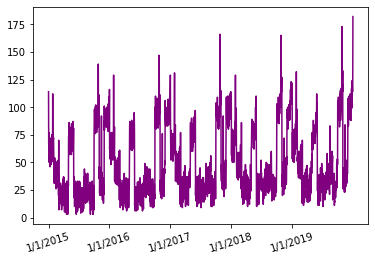

In [14]:
plt.plot(listd, listt,color='purple')
plt.xticks(ticks,labels,rotation=17)
plt.show()

In [15]:
def max(list1):
  maximus=0
  for i in list1:
    if int(i)>maximus:
      maximus=int(i)
  return maximus

In [16]:
max1= max(traffic)
print(max1)

182


In [17]:
def pre_process(max,list_row):
 for i in range(0,len(list_row)):
   list_row[i][1] = int(list_row[i][1])/max
 return list_row

In [18]:
list_row = pre_process(max1,list_row)
print(list_row[0:10])

[['1/1/2015', 0.6263736263736264, 1, 'thur'], ['2/1/2015', 0.3626373626373626, 0, 'fri'], ['3/1/2015', 0.4230769230769231, 0, 'sat'], ['4/1/2015', 0.29120879120879123, 0, 'sun'], ['5/1/2015', 0.27472527472527475, 0, 'mon'], ['6/1/2015', 0.34065934065934067, 0, 'tues'], ['7/1/2015', 0.3901098901098901, 0, 'wed'], ['8/1/2015', 0.26373626373626374, 0, 'thur'], ['9/1/2015', 0.2692307692307692, 0, 'fri'], ['10/1/2015', 0.25274725274725274, 0, 'sat']]


In [19]:
def number_to_one_hot(list1):
  listi=[]
  for i in range(0,len(list1)):
    listi.append(i)
  one_hot = keras.utils.to_categorical(listi)
  dictf={}
  count=0
  for i in listi:
    code = one_hot[i]
    ind = list1[count]
    dictf[ind] = code
    count = count+1
  return dictf

In [20]:
#Defining Seasonality
season=['winter','summer','autumn','spring','rainy']
def cur_season(season,date):
  sess= number_to_one_hot(season)
  d = date.split('/')
  w = ['11','12','1']
  a=0
  s = ['5','6','7','8']
  sp = ['2','3','4']
  aut = ['10']
  ra = ['9']
  if d[1] in w:
    a= sess['winter']
  if d[1] in s:
    a= sess['summer']
  if d[1] in sp:
    a= sess['spring']
  if d[1] in aut:
    a= sess['autumn']
  if d[1] in ra:
    a= sess['rainy']
  return a

In [21]:
#Encoding Dates
def date_enc(date):
  days=[]
  months=[]
  years=[]
  final={}
  count=0
  for i in date:
    datess = i.split("/")
    if int(datess[0]) not in days:
      days.append(int(datess[0]))
    if int(datess[1]) not in months:
      months.append(int(datess[1]))
    if int(datess[2]) not in years:
      years.append(int(datess[2]))
  day_enc = number_to_one_hot(days)
  month_enc = number_to_one_hot(months)
  count=0
  #print(days,months,years)
  years_enc = number_to_one_hot(years)
  #print("year_enc=",years_enc)
  count=0
  #print(years)
  #print(len(dates_enc),len(months_enc),years_enc)
  return day_enc,month_enc,years_enc

In [22]:
days,months,years = date_enc(date)
print(days)
print(months)
print(years)

{1: array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32), 2: array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32), 3: array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32), 4: array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32), 5: array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32), 6: array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32), 7: array([0., 0

In [23]:
def date_to_enc(date,days,months,years):
  dates = date.split("/")
  day = days[int(dates[0])]
  month = months[int(dates[1])]
  year = years[int(dates[2])]
  return day,month,year

In [24]:
#Converting Data into inputs

def conversion(week,days,months,years,list_row):
  inp_day = []
  inp_mon = []
  inp_year = []
  inp_week=[]
  inp_hol=[]
  out = []
  week1 = number_to_one_hot(week)
  count=0
  for row in list_row:
       #print(row[0])
       d = row[0]
       d_split=d.split('/')
       if d_split[2]==str(year_all[0]) or d_split[2]==str(year_all[-1]):
         continue
       #print(d)
       d1,m1,y1 = date_to_enc(d,days,months,years)
       inp_day.append(d1)
       inp_mon.append(m1)
       inp_year.append(y1)
       week2 = week1[row[3]]
       inp_week.append(week2)
       t1 = row[1]
       inp_hol.append([row[2]])
       #for i in range(0,len(o)):
       #  b[i+len(t)] = t[i]
       out.append(t1)
       count = count+1
  return inp_day,inp_mon,inp_year,inp_week,inp_hol,out

In [25]:
inp_day,inp_mon,inp_year,inp_week,inp_hol,out = conversion(week,days,months,years,list_row)
inp_day = np.array(inp_day)
inp_mon = np.array(inp_mon)
inp_year = np.array(inp_year)
inp_week = np.array(inp_week)
inp_hol = np.array(inp_hol)
#inp = inp1.reshape((inp1.shape[0],1,inp1.shape[1]))
#inp = inp.reshape((inp.shape[0],1,inp.shape[1]))
print(inp_day.shape)
print(inp_day.dtype)
print(inp_mon.shape)
print(inp_mon.dtype)
print(inp_year.shape)
print(inp_year.dtype)
print(inp_week.shape)
print(inp_week.dtype)
print(inp_hol.shape)
print(inp_hol.dtype)
out = np.array(out)
print(out.shape)
print(out.dtype)

(1095, 31)
float32
(1095, 12)
float32
(1095, 5)
float32
(1095, 7)
float32
(1095, 1)
int64
(1095,)
float64


In [26]:
def other_inputs(season):
 inp7=[]
 inp_prev=[]
 inp_sess=[]
 count=0
 for row in list_row:
  ind = count
  count=count+1
  d = row[0]
  d_split=d.split('/')
  if d_split[2]==str(year_all[0]) or d_split[2]==str(year_all[-1]):
    continue
  sess = cur_season(season,d)
  inp_sess.append(sess)
  #print(d_year)
  t7=[]
  t_prev=[]
  t_prev.append(list_row[ind-365][1])
  for j in range(0,7):
       t7.append(list_row[ind-j-1][1])
  inp7.append(t7)
  inp_prev.append(t_prev)
 return inp7,inp_prev,inp_sess

In [27]:
inp7,inp_prev,inp_sess = other_inputs(season)
inp7 = np.array(inp7)
inp7= inp7.reshape(inp7.shape[0],inp7.shape[1],1)
print(inp7.shape)
inp_prev = np.array(inp_prev)
print(inp_prev.shape)
inp_sess = np.array(inp_sess)
print(inp_sess.shape)

(1095, 7, 1)
(1095, 1)
(1095, 5)


In [28]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense,LSTM,Flatten
from tensorflow.keras.layers import concatenate

input_day = Input(shape=(inp_day.shape[1],),name = 'input_day')
input_mon = Input(shape=(inp_mon.shape[1],),name = 'input_mon')
input_year = Input(shape=(inp_year.shape[1],),name = 'input_year')
input_week = Input(shape=(inp_week.shape[1],),name = 'input_week')
input_hol = Input(shape=(inp_hol.shape[1],),name = 'input_hol')
input_day7 = Input(shape=(inp7.shape[1],inp7.shape[2]),name = 'input_day7')
input_day_prev = Input(shape=(inp_prev.shape[1],),name = 'input_day_prev')
input_day_sess = Input(shape=(inp_sess.shape[1],),name = 'input_day_sess')

x1 = Dense(5, activation='relu')(input_day)
x2 = Dense(5, activation='relu')(input_mon)
x3 = Dense(5, activation='relu')(input_year)
x5 = Dense(5, activation='relu')(input_week)
x6 = Dense(5, activation='relu')(input_hol)
x_10 = Dense(5, activation='relu')(input_day7)
x__10 = LSTM(5,return_sequences=True)(x_10)
x10 = Flatten()(x__10)
x11 = Dense(5, activation='relu')(input_day_prev)
x12 = Dense(5, activation='relu')(input_day_sess)
c = concatenate([x1, x2,x3,x5,x6,x10,x11,x12])
layer1 = Dense(64,activation='relu')(c)
outputs = Dense(1, activation='sigmoid')(layer1)

model = Model(inputs=[input_day,input_mon,input_year,input_week,input_hol,input_day7,input_day_prev,input_day_sess], outputs=outputs)
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_day7 (InputLayer)         [(None, 7, 1)]       0                                            
__________________________________________________________________________________________________
dense_5 (Dense)                 (None, 7, 5)         10          input_day7[0][0]                 
__________________________________________________________________________________________________
input_day (InputLayer)          [(None, 31)]         0                                            
__________________________________________________________________________________________________
input_mon (InputLayer)          [(None, 12)]         0                                            
______________________________________________________________________________________________

In [29]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss=['mean_squared_error'],
              optimizer = 'adam',
              metrics = ['acc']
              )

In [30]:
history = model.fit(
           x = [inp_day,inp_mon,inp_year,inp_week,inp_hol,inp7,inp_prev,inp_sess],
           y = out,
           batch_size=16,
           steps_per_epoch=50,
           epochs = 15,
           verbose=1,
           shuffle =False
           )

Epoch 1/15
50/50 [==============================] - 6s 14ms/step - loss: 0.0504 - acc: 0.0000e+00
Epoch 2/15
50/50 [==============================] - 1s 15ms/step - loss: 0.0247 - acc: 0.0000e+00
Epoch 3/15
50/50 [==============================] - 1s 16ms/step - loss: 0.0128 - acc: 0.0000e+00
Epoch 4/15
50/50 [==============================] - 1s 14ms/step - loss: 0.0066 - acc: 0.0000e+00
Epoch 5/15
50/50 [==============================] - 1s 15ms/step - loss: 0.0062 - acc: 0.0000e+00
Epoch 6/15
50/50 [==============================] - 1s 18ms/step - loss: 0.0051 - acc: 0.0000e+00
Epoch 7/15
50/50 [==============================] - 1s 17ms/step - loss: 0.0043 - acc: 0.0000e+00
Epoch 8/15
50/50 [==============================] - 1s 14ms/step - loss: 0.0042 - acc: 0.0000e+00
Epoch 9/15
50/50 [==============================] - 1s 14ms/step - loss: 0.0041 - acc: 0.0000e+00
Epoch 10/15
50/50 [==============================] - 1s 15ms/step - loss: 0.0039 - acc: 0.0000e+00
Epoch 11/15
50/50 [

In [31]:
def testing(date,traffic,order,maxj):
       out=[]
       d1,d2,d3 = date_to_enc(date,days,months,years)
       #print(da)
       #print(d[0])
       print('date=',date)
       #print(inp[0][count])
       #print(count)
       #t1 = int(traffic/maxj)
       d1 = np.array([d1])
       #print(d1.shape)
       d2 = np.array([d2])
       d3 = np.array([d3])
       #print(d2.shape)
       #print(d3.shape)
       #print(us.shape)
       week1 = number_to_one_hot(week)
       week2 = week1[day[date]]
       #print(day[date])
       week2=np.array([week2])
       #print(week2)
       #print("date=",date)
       if date in holiday:
         h=1
         print('holiday')
       else:
         h=0
         print("no holiday")
       h = np.array([h])
       #print(h)
       count=-1
       ind=0
       #print(date)
       #print(us)
       for i in list_row:
         count =count+1
         #print(count)
         #print(i[0],i[1])
         #print(date,us)
         if i[0]==date:
           #print("found")
           ind = count
       print("ind=",ind)
       sess = cur_season(season,date)
       #print(sess)
       #print(d_prev)
       t7=[]
       t_prev=[]
       t_prev.append(list_row[ind-365][1])
       print(list_row[ind-365])
       #print(list_row[ind-366*len(url)])
       #print(list_row[ind-365*len(url)])
       print("t-prev",t_prev)
       for j in range(0,7):
            t7.append(list_row[ind-j][1])
       t7 = np.array([t7])
       t7 = t7.reshape(1,7,1)
       print('t7=',t7)
       t_prev = np.array([t_prev])
       #print("prev=",t_prev)
       sess = np.array([sess])
       y_out = model.predict([d1,d2,d3,week2,h,t7,t_prev,sess])
       #print("output=",y_out)
       #print(y_out.shape)
       print(list_row[ind])
       print("output after processing=",y_out[0][0]*maxj)
       #sales on the date
       print("sales on date=",list_row[ind][1]*maxj)
       e1 = y_out[0][0]*maxj- list_row[ind][1]*maxj
       print('change from expected value= ',e1)
       return y_out[0][0]*maxj

In [32]:
a= testing('31/12/2019',116,50,max1)

date= 31/12/2019
holiday
ind= 1824
['31/12/2018', 0.6153846153846154, 1, 'mon']
t-prev [0.6153846153846154]
t7= [[[1.        ]
  [0.65934066]
  [0.62637363]
  [0.63736264]
  [0.66483516]
  [0.68131868]
  [0.63186813]]]
['31/12/2019', 1.0, 1, 'tues']
output after processing= 127.35381770133972
sales on date= 182.0
change from expected value=  -54.64618229866028


In [33]:
print(list_row)

[['1/1/2015', 0.6263736263736264, 1, 'thur'], ['2/1/2015', 0.3626373626373626, 0, 'fri'], ['3/1/2015', 0.4230769230769231, 0, 'sat'], ['4/1/2015', 0.29120879120879123, 0, 'sun'], ['5/1/2015', 0.27472527472527475, 0, 'mon'], ['6/1/2015', 0.34065934065934067, 0, 'tues'], ['7/1/2015', 0.3901098901098901, 0, 'wed'], ['8/1/2015', 0.26373626373626374, 0, 'thur'], ['9/1/2015', 0.2692307692307692, 0, 'fri'], ['10/1/2015', 0.25274725274725274, 0, 'sat'], ['11/1/2015', 0.34065934065934067, 0, 'sun'], ['12/1/2015', 0.3626373626373626, 0, 'mon'], ['13/1/2015', 0.26373626373626374, 0, 'tues'], ['14/1/2015', 0.3956043956043956, 0, 'wed'], ['15/1/2015', 0.2857142857142857, 0, 'thur'], ['16/1/2015', 0.26373626373626374, 0, 'fri'], ['17/1/2015', 0.3131868131868132, 0, 'sat'], ['18/1/2015', 0.2692307692307692, 0, 'sun'], ['19/1/2015', 0.38461538461538464, 0, 'mon'], ['20/1/2015', 0.29120879120879123, 0, 'tues'], ['21/1/2015', 0.41208791208791207, 0, 'wed'], ['22/1/2015', 0.2857142857142857, 0, 'thur'], 

In [34]:
print(date)

['1/1/2015', '2/1/2015', '3/1/2015', '4/1/2015', '5/1/2015', '6/1/2015', '7/1/2015', '8/1/2015', '9/1/2015', '10/1/2015', '11/1/2015', '12/1/2015', '13/1/2015', '14/1/2015', '15/1/2015', '16/1/2015', '17/1/2015', '18/1/2015', '19/1/2015', '20/1/2015', '21/1/2015', '22/1/2015', '23/1/2015', '24/1/2015', '25/1/2015', '26/1/2015', '27/1/2015', '28/1/2015', '29/1/2015', '30/1/2015', '31/1/2015', '1/2/2015', '2/2/2015', '3/2/2015', '4/2/2015', '5/2/2015', '6/2/2015', '7/2/2015', '8/2/2015', '9/2/2015', '10/2/2015', '11/2/2015', '12/2/2015', '13/2/2015', '14/2/2015', '15/2/2015', '16/2/2015', '17/2/2015', '18/2/2015', '19/2/2015', '20/2/2015', '21/2/2015', '22/2/2015', '23/2/2015', '24/2/2015', '25/2/2015', '26/2/2015', '27/2/2015', '28/2/2015', '1/3/2015', '2/3/2015', '3/3/2015', '4/3/2015', '5/3/2015', '6/3/2015', '7/3/2015', '8/3/2015', '9/3/2015', '10/3/2015', '11/3/2015', '12/3/2015', '13/3/2015', '14/3/2015', '15/3/2015', '16/3/2015', '17/3/2015', '18/3/2015', '19/3/2015', '20/3/2015',

In [35]:
def testmore(date_all,maxj):
  y=[]
  d=[]
  for i in range(1461,1826):
    print(date_all[i])
    y1 = testing(date_all[i],100,50,maxj)
    y.append(y1)
    d.append(date_all[i])
  return y,d

In [36]:
y,d = testmore(date,max1)

1/1/2019
date= 1/1/2019
holiday
ind= 1460
['1/1/2018', 0.6208791208791209, 1, 'mon']
t-prev [0.6208791208791209]
t7= [[[0.59340659]
  [0.61538462]
  [0.67032967]
  [0.56593407]
  [0.57692308]
  [0.6043956 ]
  [0.67582418]]]
['1/1/2019', 0.5934065934065934, 1, 'tues']
output after processing= 122.30143821239471
sales on date= 108.0
change from expected value=  14.301438212394714
2/1/2019
date= 2/1/2019
no holiday
ind= 1461
['2/1/2018', 0.31868131868131866, 0, 'tues']
t-prev [0.31868131868131866]
t7= [[[0.29120879]
  [0.59340659]
  [0.61538462]
  [0.67032967]
  [0.56593407]
  [0.57692308]
  [0.6043956 ]]]
['2/1/2019', 0.29120879120879123, 0, 'wed']
output after processing= 75.8398078083992
sales on date= 53.00000000000001
change from expected value=  22.839807808399193
3/1/2019
date= 3/1/2019
no holiday
ind= 1462
['3/1/2018', 0.3076923076923077, 0, 'wed']
t-prev [0.3076923076923077]
t7= [[[0.42307692]
  [0.29120879]
  [0.59340659]
  [0.61538462]
  [0.67032967]
  [0.56593407]
  [0.5769230

['22/1/2019', 0.3516483516483517, 0, 'tues']
output after processing= 78.42246162891388
sales on date= 64.0
change from expected value=  14.42246162891388
23/1/2019
date= 23/1/2019
no holiday
ind= 1482
['23/1/2018', 0.47802197802197804, 0, 'tues']
t-prev [0.47802197802197804]
t7= [[[0.34065934]
  [0.35164835]
  [0.46703297]
  [0.44505495]
  [0.36263736]
  [0.31868132]
  [0.34615385]]]
['23/1/2019', 0.34065934065934067, 0, 'wed']
output after processing= 86.47328424453735
sales on date= 62.0
change from expected value=  24.473284244537354
24/1/2019
date= 24/1/2019
no holiday
ind= 1483
['24/1/2018', 0.3901098901098901, 0, 'wed']
t-prev [0.3901098901098901]
t7= [[[0.4010989 ]
  [0.34065934]
  [0.35164835]
  [0.46703297]
  [0.44505495]
  [0.36263736]
  [0.31868132]]]
['24/1/2019', 0.4010989010989011, 0, 'thur']
output after processing= 78.32834941148758
sales on date= 73.0
change from expected value=  5.328349411487579
25/1/2019
date= 25/1/2019
no holiday
ind= 1484
['25/1/2018', 0.36263736

['14/2/2019', 0.2087912087912088, 0, 'thur']
output after processing= 47.32007420063019
sales on date= 38.0
change from expected value=  9.320074200630188
15/2/2019
date= 15/2/2019
no holiday
ind= 1505
['15/2/2018', 0.2032967032967033, 0, 'thur']
t-prev [0.2032967032967033]
t7= [[[0.24175824]
  [0.20879121]
  [0.28021978]
  [0.21428571]
  [0.32967033]
  [0.20879121]
  [0.28021978]]]
['15/2/2019', 0.24175824175824176, 0, 'fri']
output after processing= 41.124912798404694
sales on date= 44.0
change from expected value=  -2.8750872015953064
16/2/2019
date= 16/2/2019
no holiday
ind= 1506
['16/2/2018', 0.1978021978021978, 0, 'fri']
t-prev [0.1978021978021978]
t7= [[[0.27472527]
  [0.24175824]
  [0.20879121]
  [0.28021978]
  [0.21428571]
  [0.32967033]
  [0.20879121]]]
['16/2/2019', 0.27472527472527475, 0, 'sat']
output after processing= 43.0484122633934
sales on date= 50.00000000000001
change from expected value=  -6.951587736606605
17/2/2019
date= 17/2/2019
no holiday
ind= 1507
['17/2/2018

['8/3/2019', 0.12637362637362637, 0, 'fri']
output after processing= 27.956931591033936
sales on date= 23.0
change from expected value=  4.9569315910339355
9/3/2019
date= 9/3/2019
no holiday
ind= 1527
['9/3/2018', 0.13736263736263737, 0, 'fri']
t-prev [0.13736263736263737]
t7= [[[0.20879121]
  [0.12637363]
  [0.08241758]
  [0.07692308]
  [0.14835165]
  [0.07692308]
  [0.38461538]]]
['9/3/2019', 0.2087912087912088, 0, 'sat']
output after processing= 32.15303146839142
sales on date= 38.0
change from expected value=  -5.8469685316085815
10/3/2019
date= 10/3/2019
no holiday
ind= 1528
['10/3/2018', 0.15384615384615385, 0, 'sat']
t-prev [0.15384615384615385]
t7= [[[0.06043956]
  [0.20879121]
  [0.12637363]
  [0.08241758]
  [0.07692308]
  [0.14835165]
  [0.07692308]]]
['10/3/2019', 0.06043956043956044, 0, 'sun']
output after processing= 32.535826444625854
sales on date= 11.0
change from expected value=  21.535826444625854
11/3/2019
date= 11/3/2019
no holiday
ind= 1529
['11/3/2018', 0.06593406

['30/3/2019', 0.2087912087912088, 0, 'sat']
output after processing= 40.1481819152832
sales on date= 38.0
change from expected value=  2.148181915283203
31/3/2019
date= 31/3/2019
no holiday
ind= 1549
['31/3/2018', 0.23626373626373626, 0, 'sat']
t-prev [0.23626373626373626]
t7= [[[0.25824176]
  [0.20879121]
  [0.25824176]
  [0.2032967 ]
  [0.14835165]
  [0.15934066]
  [0.24175824]]]
['31/3/2019', 0.25824175824175827, 0, 'sun']
output after processing= 45.93064570426941
sales on date= 47.00000000000001
change from expected value=  -1.069354295730598
1/4/2019
date= 1/4/2019
no holiday
ind= 1550
['1/4/2018', 0.08791208791208792, 0, 'sun']
t-prev [0.08791208791208792]
t7= [[[0.09340659]
  [0.25824176]
  [0.20879121]
  [0.25824176]
  [0.2032967 ]
  [0.14835165]
  [0.15934066]]]
['1/4/2019', 0.09340659340659341, 0, 'mon']
output after processing= 31.792447865009308
sales on date= 17.0
change from expected value=  14.792447865009308
2/4/2019
date= 2/4/2019
no holiday
ind= 1551
['2/4/2018', 0.1

['21/4/2019', 0.11538461538461539, 0, 'sun']
output after processing= 39.10509896278381
sales on date= 21.0
change from expected value=  18.105098962783813
22/4/2019
date= 22/4/2019
no holiday
ind= 1571
['22/4/2018', 0.09340659340659341, 0, 'sun']
t-prev [0.09340659340659341]
t7= [[[0.18131868]
  [0.11538462]
  [0.24725275]
  [0.08791209]
  [0.13186813]
  [0.12087912]
  [0.08241758]]]
['22/4/2019', 0.1813186813186813, 0, 'mon']
output after processing= 33.998365342617035
sales on date= 33.0
change from expected value=  0.9983653426170349
23/4/2019
date= 23/4/2019
no holiday
ind= 1572
['23/4/2018', 0.09340659340659341, 0, 'mon']
t-prev [0.09340659340659341]
t7= [[[0.21978022]
  [0.18131868]
  [0.11538462]
  [0.24725275]
  [0.08791209]
  [0.13186813]
  [0.12087912]]]
['23/4/2019', 0.21978021978021978, 0, 'tues']
output after processing= 33.437591910362244
sales on date= 40.0
change from expected value=  -6.562408089637756
24/4/2019
date= 24/4/2019
no holiday
ind= 1573
['24/4/2018', 0.164

['14/5/2019', 0.4175824175824176, 0, 'tues']
output after processing= 76.54464328289032
sales on date= 76.0
change from expected value=  0.5446432828903198
15/5/2019
date= 15/5/2019
no holiday
ind= 1594
['15/5/2018', 0.42857142857142855, 0, 'tues']
t-prev [0.42857142857142855]
t7= [[[0.42307692]
  [0.41758242]
  [0.43956044]
  [0.39010989]
  [0.37362637]
  [0.38461538]
  [0.3956044 ]]]
['15/5/2019', 0.4230769230769231, 0, 'wed']
output after processing= 79.16470658779144
sales on date= 77.0
change from expected value=  2.164706587791443
16/5/2019
date= 16/5/2019
no holiday
ind= 1595
['16/5/2018', 0.34065934065934067, 0, 'wed']
t-prev [0.34065934065934067]
t7= [[[0.38461538]
  [0.42307692]
  [0.41758242]
  [0.43956044]
  [0.39010989]
  [0.37362637]
  [0.38461538]]]
['16/5/2019', 0.38461538461538464, 0, 'thur']
output after processing= 70.68204498291016
sales on date= 70.0
change from expected value=  0.6820449829101562
17/5/2019
date= 17/5/2019
no holiday
ind= 1596
['17/5/2018', 0.43956

['6/6/2019', 0.06043956043956044, 0, 'thur']
output after processing= 20.855491936206818
sales on date= 11.0
change from expected value=  9.855491936206818
7/6/2019
date= 7/6/2019
no holiday
ind= 1617
['7/6/2018', 0.06043956043956044, 0, 'thur']
t-prev [0.06043956043956044]
t7= [[[0.08241758]
  [0.06043956]
  [0.07142857]
  [0.13186813]
  [0.18131868]
  [0.13186813]
  [0.16483516]]]
['7/6/2019', 0.08241758241758242, 0, 'fri']
output after processing= 22.262532234191895
sales on date= 15.0
change from expected value=  7.2625322341918945
8/6/2019
date= 8/6/2019
no holiday
ind= 1618
['8/6/2018', 0.21978021978021978, 0, 'fri']
t-prev [0.21978021978021978]
t7= [[[0.1978022 ]
  [0.08241758]
  [0.06043956]
  [0.07142857]
  [0.13186813]
  [0.18131868]
  [0.13186813]]]
['8/6/2019', 0.1978021978021978, 0, 'sat']
output after processing= 28.916110336780548
sales on date= 36.0
change from expected value=  -7.083889663219452
9/6/2019
date= 9/6/2019
no holiday
ind= 1619
['9/6/2018', 0.15934065934065

['28/6/2019', 0.15384615384615385, 0, 'fri']
output after processing= 36.67667180299759
sales on date= 28.0
change from expected value=  8.676671802997589
29/6/2019
date= 29/6/2019
no holiday
ind= 1639
['29/6/2018', 0.2857142857142857, 0, 'fri']
t-prev [0.2857142857142857]
t7= [[[0.21978022]
  [0.15384615]
  [0.26923077]
  [0.2032967 ]
  [0.20879121]
  [0.12637363]
  [0.24725275]]]
['29/6/2019', 0.21978021978021978, 0, 'sat']
output after processing= 40.60288316011429
sales on date= 40.0
change from expected value=  0.6028831601142883
30/6/2019
date= 30/6/2019
no holiday
ind= 1640
['30/6/2018', 0.22527472527472528, 0, 'sat']
t-prev [0.22527472527472528]
t7= [[[0.24175824]
  [0.21978022]
  [0.15384615]
  [0.26923077]
  [0.2032967 ]
  [0.20879121]
  [0.12637363]]]
['30/6/2019', 0.24175824175824176, 0, 'sun']
output after processing= 38.58824384212494
sales on date= 44.0
change from expected value=  -5.411756157875061
1/7/2019
date= 1/7/2019
no holiday
ind= 1641
['1/7/2018', 0.21978021978

['21/7/2019', 0.22527472527472528, 0, 'sun']
output after processing= 36.79173159599304
sales on date= 41.0
change from expected value=  -4.208268404006958
22/7/2019
date= 22/7/2019
no holiday
ind= 1662
['22/7/2018', 0.24175824175824176, 0, 'sun']
t-prev [0.24175824175824176]
t7= [[[0.12087912]
  [0.22527473]
  [0.14835165]
  [0.17032967]
  [0.16483516]
  [0.1043956 ]
  [0.08791209]]]
['22/7/2019', 0.12087912087912088, 0, 'mon']
output after processing= 43.57657104730606
sales on date= 22.0
change from expected value=  21.57657104730606
23/7/2019
date= 23/7/2019
no holiday
ind= 1663
['23/7/2018', 0.14835164835164835, 0, 'mon']
t-prev [0.14835164835164835]
t7= [[[0.17032967]
  [0.12087912]
  [0.22527473]
  [0.14835165]
  [0.17032967]
  [0.16483516]
  [0.1043956 ]]]
['23/7/2019', 0.17032967032967034, 0, 'tues']
output after processing= 36.05979770421982
sales on date= 31.0
change from expected value=  5.059797704219818
24/7/2019
date= 24/7/2019
no holiday
ind= 1664
['24/7/2018', 0.214285

['12/8/2019', 0.13186813186813187, 0, 'mon']
output after processing= 35.58509808778763
sales on date= 24.0
change from expected value=  11.585098087787628
13/8/2019
date= 13/8/2019
no holiday
ind= 1684
['13/8/2018', 0.2032967032967033, 0, 'mon']
t-prev [0.2032967032967033]
t7= [[[0.11538462]
  [0.13186813]
  [0.13736264]
  [0.13736264]
  [0.18681319]
  [0.25824176]
  [0.25824176]]]
['13/8/2019', 0.11538461538461539, 0, 'tues']
output after processing= 41.9424974322319
sales on date= 21.0
change from expected value=  20.942497432231903
14/8/2019
date= 14/8/2019
no holiday
ind= 1685
['14/8/2018', 0.22527472527472528, 0, 'tues']
t-prev [0.22527472527472528]
t7= [[[0.13186813]
  [0.11538462]
  [0.13186813]
  [0.13736264]
  [0.13736264]
  [0.18681319]
  [0.25824176]]]
['14/8/2019', 0.13186813186813187, 0, 'wed']
output after processing= 44.26875227689743
sales on date= 24.0
change from expected value=  20.26875227689743
15/8/2019
date= 15/8/2019
no holiday
ind= 1686
['15/8/2018', 0.1593406

['3/9/2019', 0.0989010989010989, 0, 'tues']
output after processing= 29.193256199359894
sales on date= 18.0
change from expected value=  11.193256199359894
4/9/2019
date= 4/9/2019
no holiday
ind= 1706
['4/9/2018', 0.18681318681318682, 0, 'tues']
t-prev [0.18681318681318682]
t7= [[[0.18131868]
  [0.0989011 ]
  [0.15384615]
  [0.08791209]
  [0.30769231]
  [0.29120879]
  [0.25824176]]]
['4/9/2019', 0.1813186813186813, 0, 'wed']
output after processing= 33.85262185335159
sales on date= 33.0
change from expected value=  0.852621853351593
5/9/2019
date= 5/9/2019
no holiday
ind= 1707
['5/9/2018', 0.16483516483516483, 0, 'wed']
t-prev [0.16483516483516483]
t7= [[[0.14835165]
  [0.18131868]
  [0.0989011 ]
  [0.15384615]
  [0.08791209]
  [0.30769231]
  [0.29120879]]]
['5/9/2019', 0.14835164835164835, 0, 'thur']
output after processing= 30.013162314891815
sales on date= 27.0
change from expected value=  3.013162314891815
6/9/2019
date= 6/9/2019
no holiday
ind= 1708
['6/9/2018', 0.1648351648351648

['25/9/2019', 0.2692307692307692, 0, 'wed']
output after processing= 36.562930047512054
sales on date= 49.0
change from expected value=  -12.437069952487946
26/9/2019
date= 26/9/2019
no holiday
ind= 1728
['26/9/2018', 0.17582417582417584, 0, 'wed']
t-prev [0.17582417582417584]
t7= [[[0.14835165]
  [0.26923077]
  [0.17032967]
  [0.14835165]
  [0.13736264]
  [0.18131868]
  [0.17582418]]]
['26/9/2019', 0.14835164835164835, 0, 'thur']
output after processing= 34.56629306077957
sales on date= 27.0
change from expected value=  7.5662930607795715
27/9/2019
date= 27/9/2019
no holiday
ind= 1729
['27/9/2018', 0.1978021978021978, 0, 'thur']
t-prev [0.1978021978021978]
t7= [[[0.17032967]
  [0.14835165]
  [0.26923077]
  [0.17032967]
  [0.14835165]
  [0.13736264]
  [0.18131868]]]
['27/9/2019', 0.17032967032967034, 0, 'fri']
output after processing= 36.75044935941696
sales on date= 31.0
change from expected value=  5.750449359416962
28/9/2019
date= 28/9/2019
no holiday
ind= 1730
['28/9/2018', 0.12637

['17/10/2019', 0.6318681318681318, 0, 'thur']
output after processing= 105.39262247085571
sales on date= 115.0
change from expected value=  -9.607377529144287
18/10/2019
date= 18/10/2019
no holiday
ind= 1750
['18/10/2018', 0.5164835164835165, 0, 'thur']
t-prev [0.5164835164835165]
t7= [[[0.48351648]
  [0.63186813]
  [0.53296703]
  [0.56593407]
  [0.61538462]
  [0.48901099]
  [0.45054945]]]
['18/10/2019', 0.4835164835164835, 0, 'fri']
output after processing= 101.11813461780548
sales on date= 88.0
change from expected value=  13.118134617805481
19/10/2019
date= 19/10/2019
no holiday
ind= 1751
['19/10/2018', 0.5879120879120879, 0, 'fri']
t-prev [0.5879120879120879]
t7= [[[0.50549451]
  [0.48351648]
  [0.63186813]
  [0.53296703]
  [0.56593407]
  [0.61538462]
  [0.48901099]]]
['19/10/2019', 0.5054945054945055, 0, 'sat']
output after processing= 108.25280725955963
sales on date= 92.0
change from expected value=  16.25280725955963
20/10/2019
date= 20/10/2019
no holiday
ind= 1752
['20/10/2018

['8/11/2019', 0.19230769230769232, 0, 'fri']
output after processing= 43.23398977518082
sales on date= 35.0
change from expected value=  8.233989775180817
9/11/2019
date= 9/11/2019
no holiday
ind= 1772
['9/11/2018', 0.2087912087912088, 0, 'fri']
t-prev [0.2087912087912088]
t7= [[[0.24725275]
  [0.19230769]
  [0.1978022 ]
  [0.17582418]
  [0.2032967 ]
  [0.24725275]
  [0.18131868]]]
['9/11/2019', 0.24725274725274726, 0, 'sat']
output after processing= 41.71078318357468
sales on date= 45.0
change from expected value=  -3.2892168164253235
10/11/2019
date= 10/11/2019
no holiday
ind= 1773
['10/11/2018', 0.16483516483516483, 0, 'sat']
t-prev [0.16483516483516483]
t7= [[[0.12637363]
  [0.24725275]
  [0.19230769]
  [0.1978022 ]
  [0.17582418]
  [0.2032967 ]
  [0.24725275]]]
['10/11/2019', 0.12637362637362637, 0, 'sun']
output after processing= 38.785656571388245
sales on date= 23.0
change from expected value=  15.785656571388245
11/11/2019
date= 11/11/2019
no holiday
ind= 1774
['11/11/2018', 0

['30/11/2019', 0.3241758241758242, 0, 'sat']
output after processing= 53.60773146152496
sales on date= 59.0
change from expected value=  -5.392268538475037
1/12/2019
date= 1/12/2019
no holiday
ind= 1794
['1/12/2018', 0.5274725274725275, 0, 'sat']
t-prev [0.5274725274725275]
t7= [[[0.58241758]
  [0.32417582]
  [0.21978022]
  [0.21978022]
  [0.23076923]
  [0.24725275]
  [0.28571429]]]
['1/12/2019', 0.5824175824175825, 0, 'sun']
output after processing= 91.32550644874573
sales on date= 106.00000000000001
change from expected value=  -14.674493551254287
2/12/2019
date= 2/12/2019
no holiday
ind= 1795
['2/12/2018', 0.5384615384615384, 0, 'sun']
t-prev [0.5384615384615384]
t7= [[[0.59340659]
  [0.58241758]
  [0.32417582]
  [0.21978022]
  [0.21978022]
  [0.23076923]
  [0.24725275]]]
['2/12/2019', 0.5934065934065934, 0, 'mon']
output after processing= 96.48294925689697
sales on date= 108.0
change from expected value=  -11.517050743103027
3/12/2019
date= 3/12/2019
no holiday
ind= 1796
['3/12/201

['22/12/2019', 0.6153846153846154, 0, 'sun']
output after processing= 111.93787741661072
sales on date= 112.0
change from expected value=  -0.06212258338928223
23/12/2019
date= 23/12/2019
no holiday
ind= 1816
['23/12/2018', 0.5714285714285714, 0, 'sun']
t-prev [0.5714285714285714]
t7= [[[0.64285714]
  [0.61538462]
  [0.53846154]
  [0.56043956]
  [0.48351648]
  [0.48901099]
  [0.48351648]]]
['23/12/2019', 0.6428571428571429, 0, 'mon']
output after processing= 109.07924389839172
sales on date= 117.00000000000001
change from expected value=  -7.920756101608291
24/12/2019
date= 24/12/2019
no holiday
ind= 1817
['24/12/2018', 0.6373626373626373, 0, 'mon']
t-prev [0.6373626373626373]
t7= [[[0.54395604]
  [0.64285714]
  [0.61538462]
  [0.53846154]
  [0.56043956]
  [0.48351648]
  [0.48901099]]]
['24/12/2019', 0.5439560439560439, 0, 'tues']
output after processing= 114.82951068878174
sales on date= 98.99999999999999
change from expected value=  15.829510688781752
25/12/2019
date= 25/12/2019
no h

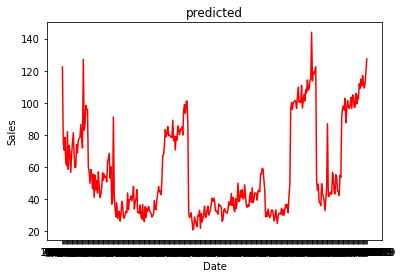

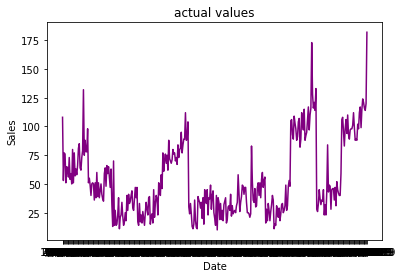

In [37]:
plt.plot(d,y,color='red')
plt.title('predicted')
plt.xlabel("Date")
plt.ylabel("Sales")
plt.show()
plt.plot(listd[1460:],listt[1460:],color='purple')
plt.xlabel("Date")
plt.ylabel("Sales")
plt.title('actual values')
plt.show()

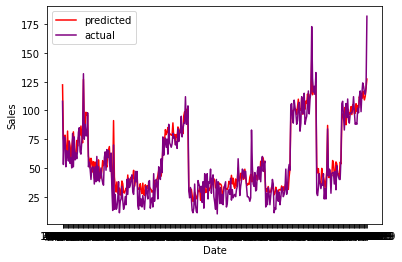

In [38]:
plt.plot(d,y,color='red',label='predicted')
plt.plot(listd[1460:],listt[1460:],color='purple',label="actual")
plt.xlabel("Date")
plt.ylabel("Sales")
leg = plt.legend()
plt.show()